In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config

In [2]:
input_taz_shapefile_folder = _config.input_taz_shapefile_folder
taz_shapefile = _config.taz_shapefile
se_years = _config.se_years
input_model_se_folder = _config.input_model_se_folder
se_base_year = _config.se_base_year
df_centers = _config.df_centers
df_projects = _config.df_projects

# Read in data from previous notebooks

,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,geometry
0,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,"POLYGON ((424043.145 4505847.017, 424036.495 4..."
1,15086,2,Neighborhood Center,1473,44.089344,52165.559080,12.890390,"POLYGON ((424421.505 4505865.604, 424414.855 4..."
2,15086,2,Neighborhood Center,1481,68.022708,13056.790069,3.226403,"POLYGON ((424229.000 4505722.832, 424209.282 4..."
3,15086,2,Neighborhood Center,1482,39.922698,11968.229688,2.957414,"POLYGON ((424396.265 4505812.237, 424384.505 4..."
4,15183,1,Neighborhood Center,176,288.616036,35706.046305,8.823156,"POLYGON ((412496.126 4566424.387, 412502.776 4..."
...,...,...,...,...,...,...,...,...
173,15069,2,Urban Center,1383,82.068433,163541.758588,40.412049,"POLYGON ((418599.665 4505156.000, 418601.602 4..."
174,23506,2,Urban Center,1383,82.068433,10615.218005,2.623077,"POLYGON ((418812.341 4505510.828, 418778.475 4..."
175,15069,2,Urban Center,1384,96.889876,208196.248028,51.446413,"POLYGON ((419387.011 4505039.208, 419373.709 4..."
176,23506,2,Urban Center,1384,96.889876,34533.423293,8.533395,"POLYGON ((419457.973 4505447.709, 419448.379 4..."


<AxesSubplot:>

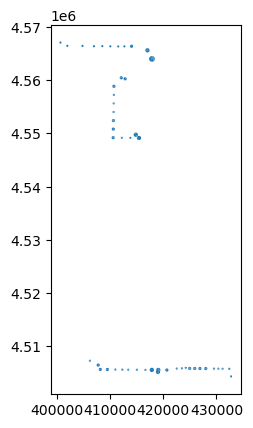

In [3]:
gdf_buffered_stops_with_centers_taz = gpd.read_file("intermediate/buffered-stops-with-centers-taz.geojson")
display(gdf_buffered_stops_with_centers_taz)
gdf_buffered_stops_with_centers_taz.plot()

In [4]:
# read proportions from REMM data
df_percent_changeable = pd.read_csv('intermediate/percent-changeable.csv')
display(df_percent_changeable)
df_area_ratio_of_taz = pd.read_csv('intermediate/parameter-area-ratio-of-taz.csv')
display(df_area_ratio_of_taz)

,N,project_id,TAZID,pctu_ch
0,10036,3.0,657.0,0.918003
1,10036,3.0,658.0,0.733657
2,10036,3.0,663.0,0.991408
3,10036,3.0,664.0,0.194214
4,10042,3.0,497.0,0.000000
...,...,...,...,...
166,27931,3.0,508.0,0.054408
167,28117,3.0,468.0,0.572808
168,28117,3.0,473.0,0.996042
169,28117,3.0,497.0,0.791458


,TAZID,N,project_id,TOTEMP,TOTHH
0,165.0,-1.0,-1.0,0.991571,1.000000
1,165.0,15191.0,1.0,0.008429,0.000000
2,172.0,-1.0,-1.0,0.000000,0.971864
3,172.0,15185.0,1.0,0.000000,0.028136
4,173.0,-1.0,-1.0,0.000000,0.996895
...,...,...,...,...,...
318,1530.0,25381.0,2.0,0.000000,0.000236
319,1531.0,-1.0,-1.0,0.601742,0.974230
320,1531.0,25381.0,2.0,0.398258,0.025770
321,1679.0,-1.0,-1.0,0.000000,0.999530


In [5]:
# join tables
gdf_buffered_stops_with_centers_taz_changeable = pd.merge(gdf_buffered_stops_with_centers_taz, df_percent_changeable, on=['N','project_id','TAZID'], how='left')
gdf_buffered_stops_with_centers_taz_changeable_ratios = pd.merge(gdf_buffered_stops_with_centers_taz_changeable, df_area_ratio_of_taz, on=['N','project_id','TAZID'], how='left')
gdf_buffered_stops_with_centers_taz_changeable_ratios.fillna(0, inplace=True)
gdf_buffered_stops_with_centers_taz_changeable_ratios = gdf_buffered_stops_with_centers_taz_changeable_ratios.melt(id_vars=['N','project_id','nearest_AreaType','TAZID','TAZACRES','sqm','acres','geometry','pctu_ch'],var_name='parameter',value_name='taz_ratio')
gdf_buffered_stops_with_centers_taz_changeable_ratios

,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,geometry,pctu_ch,parameter,taz_ratio
0,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,"POLYGON ((424043.145 4505847.017, 424036.495 4...",0.776678,TOTEMP,0.238638
1,15086,2,Neighborhood Center,1473,44.089344,52165.559080,12.890390,"POLYGON ((424421.505 4505865.604, 424414.855 4...",1.000000,TOTEMP,0.327186
2,15086,2,Neighborhood Center,1481,68.022708,13056.790069,3.226403,"POLYGON ((424229.000 4505722.832, 424209.282 4...",1.000000,TOTEMP,0.041407
3,15086,2,Neighborhood Center,1482,39.922698,11968.229688,2.957414,"POLYGON ((424396.265 4505812.237, 424384.505 4...",0.567510,TOTEMP,0.039493
4,15183,1,Neighborhood Center,176,288.616036,35706.046305,8.823156,"POLYGON ((412496.126 4566424.387, 412502.776 4...",0.000000,TOTEMP,0.104515
...,...,...,...,...,...,...,...,...,...,...,...
351,15069,2,Urban Center,1383,82.068433,163541.758588,40.412049,"POLYGON ((418599.665 4505156.000, 418601.602 4...",0.289566,TOTHH,0.355068
352,23506,2,Urban Center,1383,82.068433,10615.218005,2.623077,"POLYGON ((418812.341 4505510.828, 418778.475 4...",0.603012,TOTHH,0.039094
353,15069,2,Urban Center,1384,96.889876,208196.248028,51.446413,"POLYGON ((419387.011 4505039.208, 419373.709 4...",0.957890,TOTHH,0.628618
354,23506,2,Urban Center,1384,96.889876,34533.423293,8.533395,"POLYGON ((419457.973 4505447.709, 419448.379 4...",0.876227,TOTHH,0.060703


# Prep socioeconomic data

In [6]:
# get SE data
df_se_data = pd.DataFrame()

for se_year in se_years:
    file = "SE_" + str(se_year) + '.csv'
    se_file = os.path.join(input_model_se_folder, file)

    _dbf = pd.read_csv(se_file)

    # Identify non-numeric columns
    non_numeric_columns = _dbf.select_dtypes(include=[int, float]).columns.tolist()
    non_numeric_columns.remove(';TAZID')  # Keep 'TAZID' as identifier variable

    _df_pivot = _dbf.melt(id_vars=[';TAZID'], value_vars=non_numeric_columns)

    _df_pivot['se_year'] = se_year

    if se_year==se_base_year:
        df_se_data_base = _df_pivot
    else:
        df_se_data = pd.concat([df_se_data,_df_pivot])

df_se_data_base.columns = df_se_data_base.columns + '_B'
df_se_data.columns = df_se_data.columns + '_F'

df_se_data_base.rename(columns={';TAZID_B':'TAZID','variable_B':'parameter'}, inplace=True)
df_se_data.rename(columns={';TAZID_F':'TAZID','variable_F':'parameter'}, inplace=True)

display(df_se_data_base)
display(df_se_data)

,TAZID,parameter,value_B,se_year_B
0,1,CO_TAZID,30001.0,2023
1,2,CO_TAZID,30002.0,2023
2,3,CO_TAZID,30003.0,2023
3,4,CO_TAZID,30004.0,2023
4,5,CO_TAZID,30005.0,2023
...,...,...,...,...
92191,3542,CO_FIPS,49.0,2023
92192,3543,CO_FIPS,49.0,2023
92193,3544,CO_FIPS,49.0,2023
92194,3545,CO_FIPS,49.0,2023


,TAZID,parameter,value_F,se_year_F
0,1,CO_TAZID,30001.0,2032
1,2,CO_TAZID,30002.0,2032
2,3,CO_TAZID,30003.0,2032
3,4,CO_TAZID,30004.0,2032
4,5,CO_TAZID,30005.0,2032
...,...,...,...,...
92191,3542,CO_FIPS,49.0,2050
92192,3543,CO_FIPS,49.0,2050
92193,3544,CO_FIPS,49.0,2050
92194,3545,CO_FIPS,49.0,2050


In [7]:
df_se_growth = pd.merge(df_se_data, df_se_data_base, on=['TAZID','parameter'])
df_se_growth['growth'] = df_se_growth['value_F'] - df_se_growth['value_B']
df_se_growth_hhemp = df_se_growth[df_se_growth['parameter'].isin(['TOTHH','TOTEMP'])]
df_se_growth_hhemp

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth
10638,1,TOTHH,0.0,2032,0.0,2023,0.0
10639,1,TOTHH,0.0,2042,0.0,2023,0.0
10640,1,TOTHH,0.0,2050,0.0,2023,0.0
10641,2,TOTHH,17.4,2032,13.0,2023,4.4
10642,2,TOTHH,29.8,2042,13.0,2023,16.8
...,...,...,...,...,...,...,...
53185,3545,TOTEMP,0.0,2042,0.0,2023,0.0
53186,3545,TOTEMP,0.0,2050,0.0,2023,0.0
53187,3546,TOTEMP,0.0,2032,0.0,2023,0.0
53188,3546,TOTEMP,0.0,2042,0.0,2023,0.0


In [8]:
df_se_growth.to_csv('intermediate/se_growth.csv', index=False)

# Get max densities by center type

In [9]:
# units are TOTHH and emps are TOTEMP
_df = df_centers.copy()
_df.rename(columns={'final_units_per_acre':'TOTHH','final_emps_per_acre':'TOTEMP'}, inplace=True)
df_centers_max_per_acre = _df.melt(id_vars='center_type',var_name='parameter', value_vars=['TOTHH','TOTEMP'], value_name='perac_ch')
df_centers_max_per_acre['perac_ch'] = df_centers_max_per_acre['perac_ch'].astype(int)
df_centers_max_per_acre

,center_type,parameter,perac_ch
0,Neighborhood Center,TOTHH,18
1,City Center,TOTHH,39
2,Urban Center,TOTHH,59
3,Metropolitan Center,TOTHH,91
4,Neighborhood Center,TOTEMP,6
5,City Center,TOTEMP,13
6,Urban Center,TOTEMP,20
7,Metropolitan Center,TOTEMP,30


# Calculate additional hh/emp

In [10]:
gdf_stop_taz_calcs = pd.merge(gdf_buffered_stops_with_centers_taz_changeable_ratios, df_centers_max_per_acre, left_on=('nearest_AreaType', 'parameter'), right_on=('center_type','parameter'))
gdf_stop_taz_calcs_se = pd.merge(gdf_stop_taz_calcs, df_se_growth, on=['TAZID','parameter'])

In [11]:
_gdf = gdf_stop_taz_calcs_se.copy()

# Calculate expected growth for given polygon area
# taz_ratio is ratio of parcels allowing hh/emp growth compared to rest of TAZ
# value_B, value_F are base/future TAZ values

# total base and future
_gdf['b_tot'] = _gdf['taz_ratio'] * _gdf['value_B']
_gdf['f_tot'] = _gdf['taz_ratio'] * _gdf['value_F']

# changeable base and future
_gdf['b_ch'] = _gdf['b_tot'] * _gdf['pctu_ch']
_gdf['f_ch'] = _gdf['f_tot'] * _gdf['pctu_ch']

# changeable acres
_gdf['acres_ch'] = _gdf['acres'] * _gdf['pctu_ch']

# changeable is the acres changeable multiplied by max per acre density
_gdf['s_ch'] = _gdf['acres_ch'] * _gdf['perac_ch']

# scenario total is forecast total - forecast changeable + scenario changeable
_gdf['s_tot'] = _gdf['f_tot'] - _gdf['f_ch'] + _gdf['s_ch']

# additional for scenario is the difference
_gdf['s_diff'] = _gdf['s_tot'] - _gdf['f_tot']

# growth from base
_gdf['s_grow'] = _gdf['s_tot'] - _gdf['b_tot']

# calculate per acre densities for polygon area
_gdf['b_tot_den'] = _gdf['b_tot'] / _gdf['acres']
_gdf['f_tot_den'] = _gdf['f_tot'] / _gdf['acres']
_gdf['s_tot_den'] = _gdf['s_tot'] / _gdf['acres']

_gdf['s_grow_den'] = (_gdf['s_tot'] - _gdf['b_tot']) / _gdf['acres']
_gdf['s_diff_den'] = (_gdf['s_tot'] - _gdf['f_tot']) / _gdf['acres']

_gdf['b_tot_den'] = (_gdf['taz_ratio'] * _gdf['value_B' ]) / _gdf['acres']
_gdf['f_tot_den'] = (_gdf['taz_ratio'] * _gdf['value_F' ]) / _gdf['acres']

gdf_se_calcs = _gdf

gdf_se_calcs

,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,geometry,pctu_ch,parameter,...,acres_ch,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
0,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,"POLYGON ((424043.145 4505847.017, 424036.495 4...",0.776678,TOTEMP,...,9.546246,57.277477,97.353816,-82.101744,-75.738072,14.082676,14.600422,7.920662,-6.162015,-6.679760
1,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,"POLYGON ((424043.145 4505847.017, 424036.495 4...",0.776678,TOTEMP,...,9.546246,57.277477,98.828256,-87.229614,-74.263632,14.082676,15.137583,8.040621,-6.042055,-7.096961
2,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,"POLYGON ((424043.145 4505847.017, 424036.495 4...",0.776678,TOTEMP,...,9.546246,57.277477,100.204991,-92.017686,-72.886896,14.082676,15.639149,8.152632,-5.930044,-7.486517
3,15086,2,Neighborhood Center,1473,44.089344,52165.559080,12.890390,"POLYGON ((424421.505 4505865.604, 424414.855 4...",1.000000,TOTEMP,...,12.890390,77.342342,77.342342,-168.865158,-139.145758,16.794534,19.100081,6.000000,-10.794534,-13.100081
4,15086,2,Neighborhood Center,1473,44.089344,52165.559080,12.890390,"POLYGON ((424421.505 4505865.604, 424414.855 4...",1.000000,TOTEMP,...,12.890390,77.342342,77.342342,-206.764208,-139.145758,16.794534,22.040182,6.000000,-10.794534,-16.040182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,10046,1,Metropolitan Center,390,37.583728,146896.322244,36.298872,"POLYGON ((418169.004 4563560.006, 418123.854 4...",0.588706,TOTHH,...,21.369354,1944.611210,1996.818707,1869.884050,1908.744848,2.426353,3.496931,55.010490,52.584137,51.513558
1064,10046,1,Metropolitan Center,390,37.583728,146896.322244,36.298872,"POLYGON ((418169.004 4563560.006, 418123.854 4...",0.588706,TOTHH,...,21.369354,1944.611210,2005.989409,1856.757573,1917.915550,2.426353,4.111198,55.263134,52.836781,51.151936
1065,10046,1,Metropolitan Center,392,26.797133,55531.069672,13.722026,"POLYGON ((418384.296 4563850.293, 418366.563 4...",0.842694,TOTHH,...,11.563467,1052.275512,1052.950453,1048.659832,1052.950453,0.000000,0.312681,76.734328,76.734328,76.421646
1066,10046,1,Metropolitan Center,392,26.797133,55531.069672,13.722026,"POLYGON ((418384.296 4563850.293, 418366.563 4...",0.842694,TOTHH,...,11.563467,1052.275512,1054.300336,1041.428471,1054.300336,0.000000,0.938044,76.832701,76.832701,75.894657


In [12]:
gdf_1384 = gdf_se_calcs[(gdf_se_calcs['TAZID']==1384)]
df_1384 = pd.DataFrame(gdf_1384)
df_1384

,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,geometry,pctu_ch,parameter,...,acres_ch,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
495,15069,2,Urban Center,1384,96.889876,208196.248028,51.446413,"POLYGON ((419387.011 4505039.208, 419373.709 4...",0.957890,TOTEMP,...,49.280029,985.600584,1030.960347,-46.224958,-29.828973,20.619306,20.938006,20.039499,-0.579807,-0.898507
496,15069,2,Urban Center,1384,96.889876,208196.248028,51.446413,"POLYGON ((419387.011 4505039.208, 419373.709 4...",0.957890,TOTEMP,...,49.280029,985.600584,1061.026497,-730.157570,0.237177,20.619306,34.816500,20.623916,0.004610,-14.192585
497,15069,2,Urban Center,1384,96.889876,208196.248028,51.446413,"POLYGON ((419387.011 4505039.208, 419373.709 4...",0.957890,TOTEMP,...,49.280029,985.600584,1063.979268,-797.325995,3.189947,20.619306,36.179495,20.681311,0.062005,-15.498184
498,23506,2,Urban Center,1384,96.889876,34533.423293,8.533395,"POLYGON ((419457.973 4505447.709, 419448.379 4...",0.876227,TOTEMP,...,7.477192,149.543844,162.418692,58.398719,59.982022,12.004211,12.189753,19.033304,7.029093,6.843551
499,23506,2,Urban Center,1384,96.889876,34533.423293,8.533395,"POLYGON ((419457.973 4505447.709, 419448.379 4...",0.876227,TOTEMP,...,7.477192,149.543844,170.952623,-2.015683,68.515953,12.004211,20.269578,20.033366,8.029155,-0.236211
500,23506,2,Urban Center,1384,96.889876,34533.423293,8.533395,"POLYGON ((419457.973 4505447.709, 419448.379 4...",0.876227,TOTEMP,...,7.477192,149.543844,171.790733,-7.948929,69.354063,12.004211,21.063090,20.131582,8.127371,-0.931508
1029,15069,2,Urban Center,1384,96.889876,208196.248028,51.446413,"POLYGON ((419387.011 4505039.208, 419373.709 4...",0.957890,TOTHH,...,49.280029,2907.521723,2914.465893,2749.558542,2900.845845,0.264742,3.205420,56.650517,56.385774,53.445097
1030,15069,2,Urban Center,1384,96.889876,208196.248028,51.446413,"POLYGON ((419387.011 4505039.208, 419373.709 4...",0.957890,TOTHH,...,49.280029,2907.521723,2915.952669,2715.737963,2902.332621,0.264742,3.891714,56.679416,56.414674,52.787703
1031,15069,2,Urban Center,1384,96.889876,208196.248028,51.446413,"POLYGON ((419387.011 4505039.208, 419373.709 4...",0.957890,TOTHH,...,49.280029,2907.521723,2916.526203,2702.691449,2902.906155,0.264742,4.156456,56.690564,56.425822,52.534108
1032,23506,2,Urban Center,1384,96.889876,34533.423293,8.533395,"POLYGON ((419457.973 4505447.709, 419448.379 4...",0.876227,TOTHH,...,7.477192,441.154340,443.125363,427.200844,441.810124,0.154129,1.866141,51.928380,51.774251,50.062239


In [13]:
import geopandas as gpd

# Assuming gdf_se_calcs is your existing GeoDataFrame

# Step 1: Filter rows where parameter is TOTHH
gdf_tothh = gdf_se_calcs[gdf_se_calcs['parameter'] == 'TOTHH'].copy()

# Step 2: Identify numeric columns that don't contain 'pct' or 'acres'
columns_to_multiply = [col for col in gdf_tothh.columns if col not in ['parameter','project_id','nearest_AreaType','TAZID','TAZACRES','taz_ratio','sqm','geometry','N'] and 'year' not in col and 'pct' not in col and 'acres' not in col and gdf_tothh[col].dtype != 'object']

# Step 3: Multiply selected columns by 1.08
gdf_tothh[columns_to_multiply] *= 1.08

# Step 4: Filter rows where parameter is TOTEMP
gdf_totemp = gdf_se_calcs[gdf_se_calcs['parameter'] == 'TOTEMP'].copy()

# Step 5: Ensure the indices match for correct addition
gdf_tothh.index = gdf_totemp.index

# Step 6: Create a new DataFrame for the sum of TOTHH * 1.08 and TOTEMP
gdf_tothhemp = gdf_totemp.copy()
gdf_tothhemp[columns_to_multiply] += gdf_tothh[columns_to_multiply]
gdf_tothhemp['parameter'] = 'TOTHHEMP'

# Step 7: Append the new rows to the original GeoDataFrame
gdf_se_calcs2 = pd.concat([gdf_se_calcs, gdf_tothhemp], ignore_index=True)

# Now gdf_se_calcs should have the new TOTHHEMP rows added


In [14]:
gdf_se_calcs2[['se_year_B']]

,se_year_B
0,2023
1,2023
2,2023
3,2023
4,2023
...,...
1597,2023
1598,2023
1599,2023
1600,2023


In [15]:
_gdf.groupby(['TAZID','parameter'], as_index=False).sum()

,TAZID,parameter,N,project_id,TAZACRES,sqm,acres,pctu_ch,taz_ratio,perac_ch,...,acres_ch,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
0,165,TOTEMP,45573,3,14313.894679,380792.949177,94.095987,0.000000,0.025288,18,...,0.000000,0.000000,19.401624,0.000000,11.086040,0.265120,0.618569,0.618569,0.353449,0.000000
1,165,TOTHH,45573,3,14313.894679,380792.949177,94.095987,0.000000,0.000000,54,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,172,TOTEMP,45555,3,1165.075927,112874.323214,27.891853,0.000000,0.000000,18,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,172,TOTHH,45555,3,1165.075927,112874.323214,27.891853,0.000000,0.084408,54,...,0.000000,0.000000,15.423307,0.000000,8.712832,0.721767,1.658905,1.658905,0.937137,0.000000
4,173,TOTEMP,45552,3,1515.829447,32155.649119,7.945834,0.000000,0.000000,18,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,1530,TOTHH,76143,6,944.282336,27988.527121,6.916116,0.000000,0.000709,54,...,0.000000,0.000000,0.532118,0.000000,0.049821,0.209206,0.230816,0.230816,0.021611,0.000000
306,1531,TOTEMP,76143,6,1477.929288,323888.238224,80.034527,1.877119,1.194773,18,...,50.078116,300.468696,679.914376,-333.850448,-352.568557,38.701407,37.999781,25.485790,-13.215617,-12.513991
307,1531,TOTHH,76143,6,1477.929288,323888.238224,80.034527,1.877119,0.077309,54,...,50.078116,901.406088,929.263505,854.836860,866.269933,2.361240,2.789795,34.832348,32.471108,32.042553
308,1679,TOTEMP,76143,6,232.749424,28916.183832,7.145345,3.000000,0.000000,18,...,7.145345,42.872068,42.872068,42.872068,42.872068,0.000000,0.000000,18.000000,18.000000,18.000000


In [16]:
# filter for map year
gdf_se_calcs_to_map = gdf_se_calcs2[gdf_se_calcs2['se_year_F']==_config.map_year]

# Project to WGS 84 (EPSG:4326)
gdf_se_calcs_to_map = gdf_se_calcs_to_map.to_crs(epsg=4326)

# Export to GeoJSON
gdf_se_calcs_to_map.to_file('_site/data/se_calcs.geojson', driver='GeoJSON')


In [17]:
gdf_se_calcs2[(gdf_se_calcs2['N']==15086) & (gdf_se_calcs2['TAZID']==1472)][['taz_ratio','parameter','N','se_year_F']]

,taz_ratio,parameter,N,se_year_F
0,0.238638,TOTEMP,15086,2032
1,0.238638,TOTEMP,15086,2042
2,0.238638,TOTEMP,15086,2050
534,0.419705,TOTHH,15086,2032
535,0.419705,TOTHH,15086,2042
536,0.419705,TOTHH,15086,2050
1068,0.238638,TOTHHEMP,15086,2032
1069,0.238638,TOTHHEMP,15086,2042
1070,0.238638,TOTHHEMP,15086,2050


# Create HTML table

In [18]:
# summary table
_df = gdf_se_calcs2[gdf_se_calcs2['se_year_F']==2050]

_df = _df[['project_id','center_type','b_tot','f_tot','s_tot','parameter',]]

df_grouped = _df.groupby(['project_id','parameter'], as_index=False).sum()

# Replacing values in the 'parameter' column
df_grouped['parameter'] = df_grouped['parameter'].replace({
    'TOTHH': 'Households',
    'TOTEMP': 'Employees',
    'TOTHHEMP': 'HH+Emp Intensity'
})
# Merging df_grouped with df_projects to get project_name
df_grouped = df_grouped.merge(df_projects[['project_id', 'project_name']], on='project_id')

# Getting unique project_names
project_names = df_grouped['project_name'].unique()

# Function to format numbers
def format_numbers(value):
    return "{:,.0f}".format(value)

# Iterate over each project_name and create a separate HTML table
for project_name in project_names:
    df_project = df_grouped[df_grouped['project_name'] == project_name]
    
    # Apply number formatting
    df_project[['b_tot', 'f_tot', 's_tot']] = df_project[['b_tot', 'f_tot', 's_tot']].applymap(format_numbers)
    
    # Drop project_id and project_name column for the table
    df_project = df_project.drop(columns=['project_id', 'project_name'])
    
    # Convert to HTML
    html_table = df_project.to_html(index=False, escape=False)
    
    # Add h3 header for project_name
    html_output = f"<h3>Project Name: {project_name}</h3>\n{html_table}"
    
    print(html_output)


<h3>Project Name: West Weber Rail</h3>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>parameter</th>
      <th>b_tot</th>
      <th>f_tot</th>
      <th>s_tot</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employees</td>
      <td>4,597</td>
      <td>5,082</td>
      <td>7,143</td>
    </tr>
    <tr>
      <td>Households</td>
      <td>144</td>
      <td>662</td>
      <td>18,230</td>
    </tr>
    <tr>
      <td>HH+Emp Intensity</td>
      <td>4,753</td>
      <td>5,797</td>
      <td>26,832</td>
    </tr>
  </tbody>
</table>
<h3>Project Name: 3300/3500 South</h3>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>parameter</th>
      <th>b_tot</th>
      <th>f_tot</th>
      <th>s_tot</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employees</td>
      <td>15,590</td>
      <td>16,786</td>
      <td>11,987</td>
    </tr>
    <tr>
      <td>Households</td>
      <td>4,172</td>
     

C:\Users\bhereth\AppData\Local\Temp\ipykernel_24276\579806420.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project[['b_tot', 'f_tot', 's_tot']] = df_project[['b_tot', 'f_tot', 's_tot']].applymap(format_numbers)
C:\Users\bhereth\AppData\Local\Temp\ipykernel_24276\579806420.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project[['b_tot', 'f_tot', 's_tot']] = df_project[['b_tot', 'f_tot', 's_tot']].applymap(format_numbers)
C:\Users\bhereth\AppData\Local\Temp\ipykernel_24276\579806420.py:29:

In [19]:
gdf_se_calcs2.to_file('intermediate/se_calcs2.geojson', format='GeoJSON')
df_se_data.to_csv('intermediate/se_data.csv', index=False)